# HomeWork 3 

### Dataset

In this homework, we will use Bank Marketing Dataset.

In [68]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/workspaces/Machine-Learning-Bootcamp-by-Zoomcamp/Week3/Homework/bank-full.csv', sep = ';')

In [6]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposite or not.

### Feature

for the rest of the homework, we'll need to use only these columns:

age, job, martial, education, balance, housing, contact, day, month, duration, campaign, pdays, previous, poutcome, y

### Data preparation

1. Select only the feature from above.
2. Check if the missing values are presented in the feature.

In [8]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns].copy()

In [9]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
df.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Question 1 

what is the most frequent observation (mode) for the column education ?

In [14]:
df['education'].mode()

0    secondary
Name: education, dtype: object

In [ ]:
df.describe(include = ['O'])

,job,marital,education,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,3,12,4,2
top,blue-collar,married,secondary,yes,cellular,may,unknown,no
freq,9732,27214,23202,25130,29285,13766,36959,39922


In [17]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

## Question 2 

1. Create the correlation matrix for the numerical features for the dataset
2. In a corelation matrix, compute the corelation coeficient between every pair of ffeature in the dataset
3. What are the two feature that have the biggest corelation in this dataset?

In [18]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
numeric_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data_numeric = df[numeric_col].copy()

In [20]:
data_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
data_numeric.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

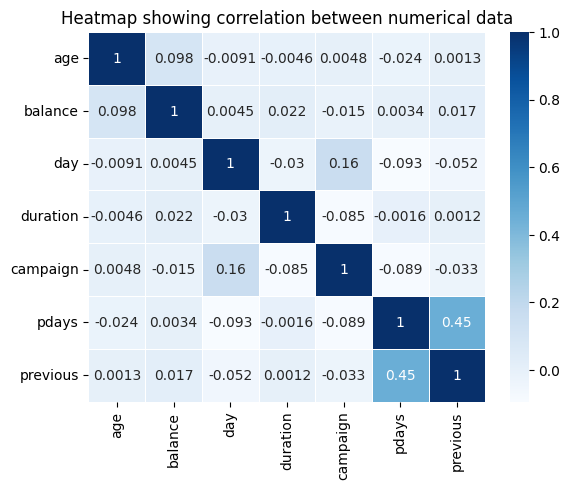

In [23]:
plt.Figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), annot=True, linewidths = 0.5, cmap='Blues')
plt.title('Heatmap showing correlation between numerical data')
plt.show()

In [26]:
data_numeric.corr().unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
balance   duration    0.021560
duration  balance     0.021560
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

## Target encoding

Now we want to encode the y variable
Let's replace values yes/no with 1/0

In [27]:
df.y = (df.y == 'yes').astype(int)

In [28]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### Split the data

Split data in train/val/test set with 60%20%20% distribution
Use scikit-learn for the spliting the data
make sure that the target value is not in the dataframe

In [29]:
Seed = 42

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error


In [31]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=Seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=Seed)

assert len(df) == len(df_train) + len(df_val) + len(df_test)

In [32]:
len(df_train) , len(df_val), len(df_test)

(27126, 9042, 9043)

In [33]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


In [34]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

### Question 3 

1. Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only
2. Round the score to 2 decimal using round(score, 2)
3. Which of these variable has the biggest score ?.

In [35]:
def calculate_mi(Series):

    return mutual_info_score(Series, df_train.y)

In [42]:
categorical_col = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [44]:
df_mi = df_train[categorical_col].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MutualInformation')

In [45]:
df_mi

,MutualInformation
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


### Question 4
1. Now let's train the logistics regression
2. Remember that we have several categorical variable in the dataset. Iclude them using one-hot encoding
3. Fit the model on the training dataset:
     a. To make sure the result are reproducible across different version of Scikit-learn, fit the moodel with these parameters:
     b. model = LogisticsRegression(solver = 'liblinear', C = 1.0, max_iter = 1000, random_state = 42)
4. Calculate the accracy on the validation dataset and round it to 2 decimal digits.     

In [47]:
dv = DictVectorizer(sparse = False)


In [50]:
df_train = df_train.drop('y', axis = 1)
df_val = df_val.drop('y', axis = 1)
df_test = df_test.drop('y', axis = 1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

In [54]:
train_dict = df_train.to_dict(orient = 'records')
train_dict
X_train = dv.fit_transform(train_dict)

In [ ]:
X_train

array([[3.200e+01, 1.100e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.309e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 2.311e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 1.500e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], shape=(27126, 47))

In [58]:
model = LogisticRegression(solver = 'liblinear', max_iter=1000,C=1.0,random_state=Seed)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [61]:
def prepare(X):

    dict = X.to_dict(orient = 'records')
    X_val = dv.transform(dict)
    return X_val

In [62]:
X_val = prepare(df_val)

In [63]:
X_val

array([[ 3.800e+01, -1.000e+01,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 4.200e+01,  1.146e+03,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 4.300e+01,  1.490e+02,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [ 4.500e+01,  8.570e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         2.000e+01],
       [ 4.000e+01,  1.530e+02,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 4.500e+01,  7.000e+00,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]], shape=(9042, 47))

In [64]:
y_pred = model.predict(X_val)

In [65]:
original_score = accuracy_score(y_val, y_pred)

In [66]:
original_score

0.9009068790090687

In [69]:
accuracy = np.round(original_score, 2)
print(f'accuracy ={accuracy}')

accuracy =0.9


### Question 5

1. .let's find the least useful feature using the feature elemination technique
2. Train a model with all these feature (using the same parameters as in Q4)
3. Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
4. For each feature, calculate the difference between the original accuracy and the accuracy without the feature
5. list of following feature has the smallest difference
       a. age
       b. balance
       c. marital
       d. previous


In [71]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [72]:
scores = pd.DataFrame(columns=['eleminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient = 'records')
    X_train = dv.fit_transform(train_dict)


    model = LogisticRegression(solver = 'liblinear', max_iter=1000,C=1.0,random_state=Seed)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient = 'records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.loc[len(scores)] = [feature, score, original_score - score]


In [73]:
scores

,eleminated_feature,accuracy,difference
0,age,0.901349,-0.000442
1,job,0.901128,-0.000221
2,marital,0.900907,0.000000
3,education,0.900907,0.000000
4,balance,0.901017,-0.000111
5,housing,0.901128,-0.000221
6,contact,0.900464,0.000442
7,day,0.901349,-0.000442
8,month,0.899801,0.001106
9,duration,0.889737,0.011170


In [74]:
scores[scores.index == scores.difference.abs().idxmin()]

,eleminated_feature,accuracy,difference
2,marital,0.900907,0.0


**marital and education features are the least important in our case.**

# Question 6

1. Now let's train a regularized logistics regrression
2. Let's try the following values in the parameters C:[0, 0.01, 0.1, 1, 10]
3. train models using all the features as in Q4
calculate the accuracy on the validation datset and round it to 3 decimal digit.
4. which of these C leads to the best accuracy on the validation set.

In [75]:
y_train.shape, y_val.shape

((27126,), (9042,))

In [76]:
dv = DictVectorizer(sparse = False)
train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)


val_dict = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dict)


In [77]:
scores = {}

for C in [0.01, 0.1, 1, 10, 100]:

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C, random_state=Seed)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)

    scores[C] = round(score, 3)

    print(f'C ={C}:\tAccuracy = {score}')


C =0.01:	Accuracy = 0.8979208139792081
C =0.1:	Accuracy = 0.9007962840079629
C =1:	Accuracy = 0.9009068790090687
C =10:	Accuracy = 0.9009068790090687
C =100:	Accuracy = 0.9006856890068569


In [78]:
scores

{0.01: 0.898, 0.1: 0.901, 1: 0.901, 10: 0.901, 100: 0.901}